In [2]:
% matplotlib inline
import MySQLdb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


#conn = MySQLdb.connect(host='hostname', user='username', passwd='password', db='dbname')
curs = conn.cursor() 
curs.execute("SELECT label_US, tweet FROM newAmerica ")
A = np.array(curs.fetchall()) 


curs.execute("SELECT label_UK, tweet FROM newEngland ")
B = np.array(curs.fetchall()) 

In [3]:
all_data = np.concatenate((A[:,1], B[:,1]), axis=0)
all_labels = np.concatenate((A[:,0],B[:,0]),axis=0)
all_labels = np.array(all_labels, dtype='int16')


In [4]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(all_data, all_labels, train_size=0.8, random_state=666)

In [5]:
vectorizer = CountVectorizer(stop_words="english",decode_error="ignore",max_features=100000)
#CountVectorizer(stop_words="english", ngram_range=(1), max_features=100000)#ngram_range=(1, 2),
feature_selector = SelectKBest(chi2, k=5000)
classifier = LogisticRegression()

In [6]:
vectorizer = CountVectorizer(stop_words="english",decode_error="ignore",max_features=100000) #ngram_range=(1, 2),
vectorizer.fit(train_X)

CountVectorizer(analyzer=u'word', binary=False, charset=None,
        charset_error=None, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
train_X = vectorizer.transform(train_X)
test_X = vectorizer.transform(test_X)

In [8]:
from sklearn import svm
#clfNB = BernoulliNB(binarize=0.0)
#clf = MultinomialNB
clf = LogisticRegression(penalty='l1')
#clfSVM = svm.SVC(verbose=2)

In [9]:
#print("training NaiveBayes classifier...")
clf.fit(train_X, train_y) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l1', random_state=None, tol=0.0001)

In [10]:
#prediction = clf.predict(test_X_tfidf)
prediction = clf.predict(test_X)
#prediction2_lr = clf.predict_proba(test_X)[:,1]

In [11]:
from sklearn.metrics import roc_curve, auc

In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, clf.predict_proba(test_X)[:, 1])

In [14]:
roc_auc = auc(false_positive_rate, true_positive_rate)

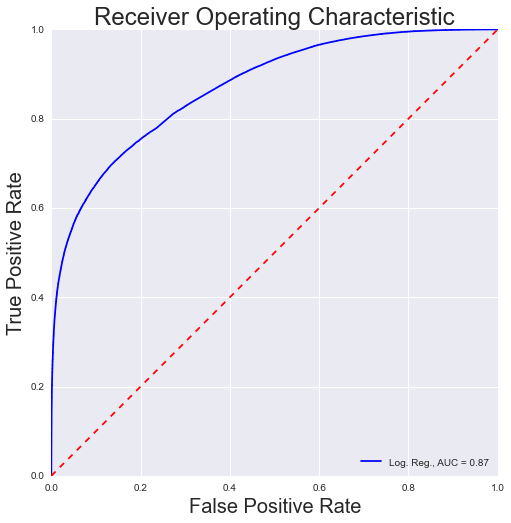

In [15]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, 'b',
#label='Naive Bayes, AUC = %0.2f'% roc_auc, )
#plt.plot(false_positive_rate_NB, true_positive_rate_NB, 'g',
label='Log. Reg., AUC = %0.2f'% roc_auc)
plt.title('Receiver Operating Characteristic', size=24)
#plt.plot(false_positive_rate_svm, true_positive_rate, 'k',
#label='SVM, AUC = %0.2f'% roc_auc_svm)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate', size=20)
plt.xlabel('False Positive Rate', size=20)
plt.show()


In [16]:
acc_score=accuracy_score(test_y, prediction)
precision_score=precision_score(test_y, prediction, average='macro')
recall_score=recall_score(test_y, prediction, average='macro') 
f1=f1_score(test_y, prediction, average='macro')  
print(len(test_y),acc_score,precision_score,recall_score,f1,'!!!')

(207504, 0.78248130156527107, 0.84145926502041613, 0.68331820155528367, 0.75418799695022343, '!!!')


In [18]:
feature_selector = SelectKBest(chi2, k=1000).fit(train_X,train_y)
#print feature_selector.shape

0.679536679537
[1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1
 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1
 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0
 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0]
259
0.602780484802
0.201342281879
[1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0]
149
0.245767407815
0.464809384164
[0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 1 0 0 1

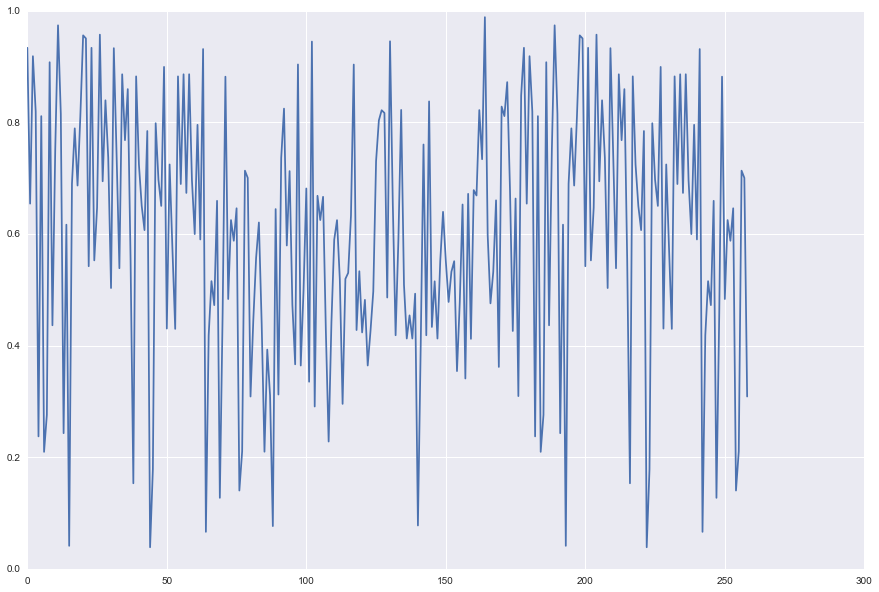

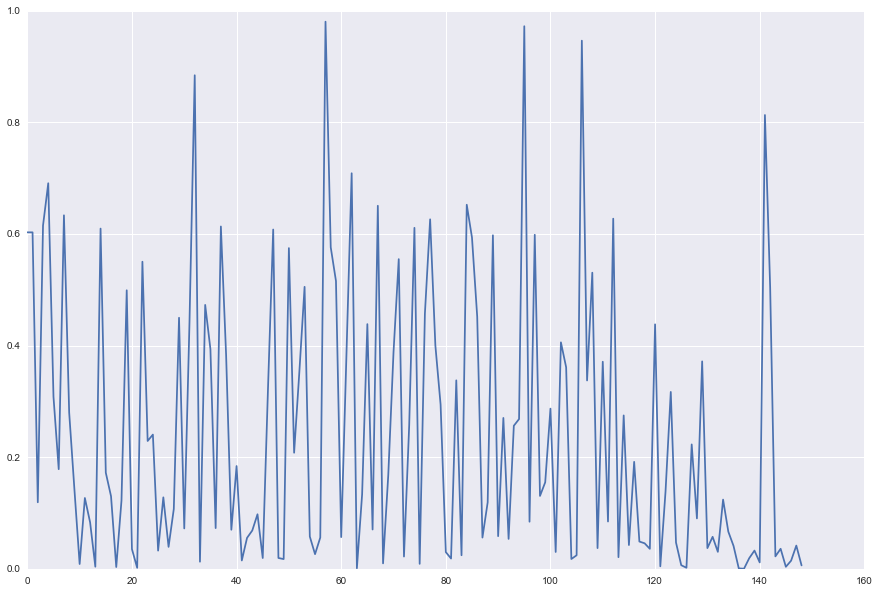

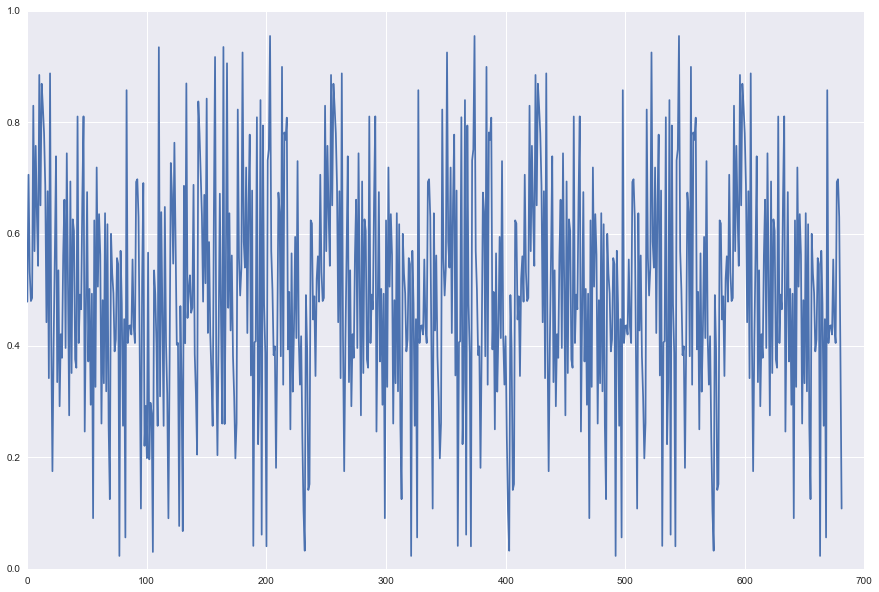

In [28]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

conn = MySQLdb.connect(host='hostname', user='username', passwd='password', db='dbname')
curs = conn.cursor()
#curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'aslihanic' ")
curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'ibm' ")
#curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'hmason' ")
#curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'thomyorke' ")
example = np.array(curs.fetchall())
#print example
new_example = []
for tweet in example:
    new_example.append(tweet[0])
    

#new_example=['-'.join(new_example)]
#print new_example
plt.figure(figsize=(15,10))
new_example2 = vectorizer.transform(new_example)
example_prediction = clf.predict(new_example2)
#example_prediction2 = np.mean(clf.predict_proba(new_example2[:,1]))
print np.mean(example_prediction)
print example_prediction
print len(example_prediction)
print(np.mean(clf.predict_proba(new_example2)[:,1]))
#plt.hist(clfNB.predict_proba(new_example2)[:,1],normed=True, bins = 15, alpha = 0.5, label=['David Cameron'])
plt.plot(clf.predict_proba(new_example2)[:,1] ,label=['David Cameron'])



curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'hillaryclinton' ")
#curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'hmason' ")
#curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'thomyorke' ")
example = np.array(curs.fetchall())
#print example
new_example = []
for tweet in example:
    new_example.append(tweet[0])
    
plt.figure(figsize=(15,10))
#new_example=['-'.join(new_example)]
#print new_example
#plt.figure(figsize=(15,10))
new_example2 = vectorizer.transform(new_example)
example_prediction = clf.predict(new_example2)
#example_prediction2 = np.mean(clf.predict_proba(new_example2[:,1]))
print np.mean(example_prediction)
print example_prediction
print len(example_prediction)
print(np.mean(clf.predict_proba(new_example2)[:,1]))
#plt.hist(clfNB.predict_proba(new_example2)[:,1],normed=True, bins = 15, alpha = 0.5,label=['Hillary Clinton'])
plt.plot(clf.predict_proba(new_example2)[:,1],label=['Hillary Clinton'])

#curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'hillaryclinton' ")
curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'hmason' ")
#curs.execute("SELECT TWEET FROM tweets_by_user where HANDLE = 'thomyorke' ")
example = np.array(curs.fetchall())
#print example
new_example = []
for tweet in example:
    new_example.append(tweet[0])
    
plt.figure(figsize=(15,10))
#new_example=['-'.join(new_example)]
#print new_example
#plt.figure(figsize=(15,10))
new_example2 = vectorizer.transform(new_example)
example_prediction = clf.predict(new_example2)
#example_prediction2 = np.mean(clf.predict_proba(new_example2[:,1]))
print np.mean(example_prediction)
print example_prediction
print len(example_prediction)
print(np.mean(clf.predict_proba(new_example2)[:,1]))
#plt.hist(clfNB.predict_proba(new_example2)[:,1],normed=True, bins = 15, alpha = 0.5,label=['Hilary Mason'])
plt.plot(clf.predict_proba(new_example2)[:,1],label=['Hilary Mason'])
#plt.legend()
#df1.plot(kind='area')  #blue line       # window on random 20 tweets to visualize how well we are doing
#plt.plot(prediction[11400:11420])

In [45]:
clf.classes_

array([0, 1], dtype=int16)